<a href="https://colab.research.google.com/github/Willi8910/Stock-Value-Scraper/blob/main/Value_Investing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Value Investing Analytics
!pip install kora -q
!pip install yfinance
import yfinance as yf
from kora.selenium import wd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By


def financialsGetRow(id):
  return np.array([ float(number.get_attribute("rawvalue")) if number.get_attribute("rawvalue") != "—" else 0 for number in driver.find_element_by_id(id).find_elements_by_tag_name("div")])

def financialsGetRowText(id):
  return np.array([ number.text for number in driver.find_element_by_id(id).find_elements_by_tag_name("div")])

def ratiosGetRowByCssSelector(cssSelector):
  return np.array([float(number.text.replace("—", "-").replace(",", "")) if is_number(number.text.replace(",", "")) else 0 for number in driver.find_elements_by_css_selector("td[headers$='{0}']".format(cssSelector))])

def valuationGetRowByCssSelector(cssSelector):
  return np.array([float(number.text.replace("—", "-")) if is_number(number.text) else 0 for number in driver.find_element_by_css_selector(cssSelector).find_elements_by_xpath(".//*")[1:]])

def is_number(s):
  try:
      float(s)
      return True
  except ValueError:
      return False

def calculate_mos(price, fair_price):
  return (fair_price - price) / fair_price * 100



     |████████████████████████████████| 57 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 21.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Terminology:**

1.   The **Debt-to-Equity (D/E)** ratio compares a company's total liabilities to its shareholder equity and can be used to evaluate how much leverage a company is using. Higher-leverage ratios tend to indicate a company or stock with higher risk to shareholders.
2.   The **Current Ratio** is a liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year.
3.   **Return on equity (ROE)** is a measure of financial performance calculated by dividing net income by shareholders' equity.
4.   **Book value per share (BVPS)** / Price per stock is the ratio of equity available to common shareholders divided by the number of outstanding shares
5.   The **Dividend Yield**, expressed as a percentage, is a financial ratio (dividend/price) that shows how much a company pays out in dividends each year relative to its stock price.
6.   **Earnings per share (EPS)** is a company's net profit divided by the number of common shares it has outstanding.
7.   The **Price-Earnings (P/E)** ratio relates a company's share price to its earnings per share.
8.   Investors use the **Price-to-Book** value to gauge whether a company's stock price is valued properly. (< 1 means undervalue, > 1 overvalue)
9.   **Net profit margin** measures how much net income is generated as a percentage of revenues received.
10.  **Capital expenditures (CapEx)** are funds used by a company to acquire, upgrade, and maintain physical assets such as property, plants, buildings, technology, or equipment.
11.  The **Cash Ratio** is a liquidity measure that shows a company's ability to cover its short-term obligations using only cash and cash equivalents
12.  **Free Cash Flow** -FCF- is an efficiency and liquidity ratio that calculates the how much more cash a company generates than it uses to run and expand the business

Input Stock Name :

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: Deprecat

[(8.0, 597.3), Text(0.5, 1.0, '12. Free Cashflow ( Positive )')]

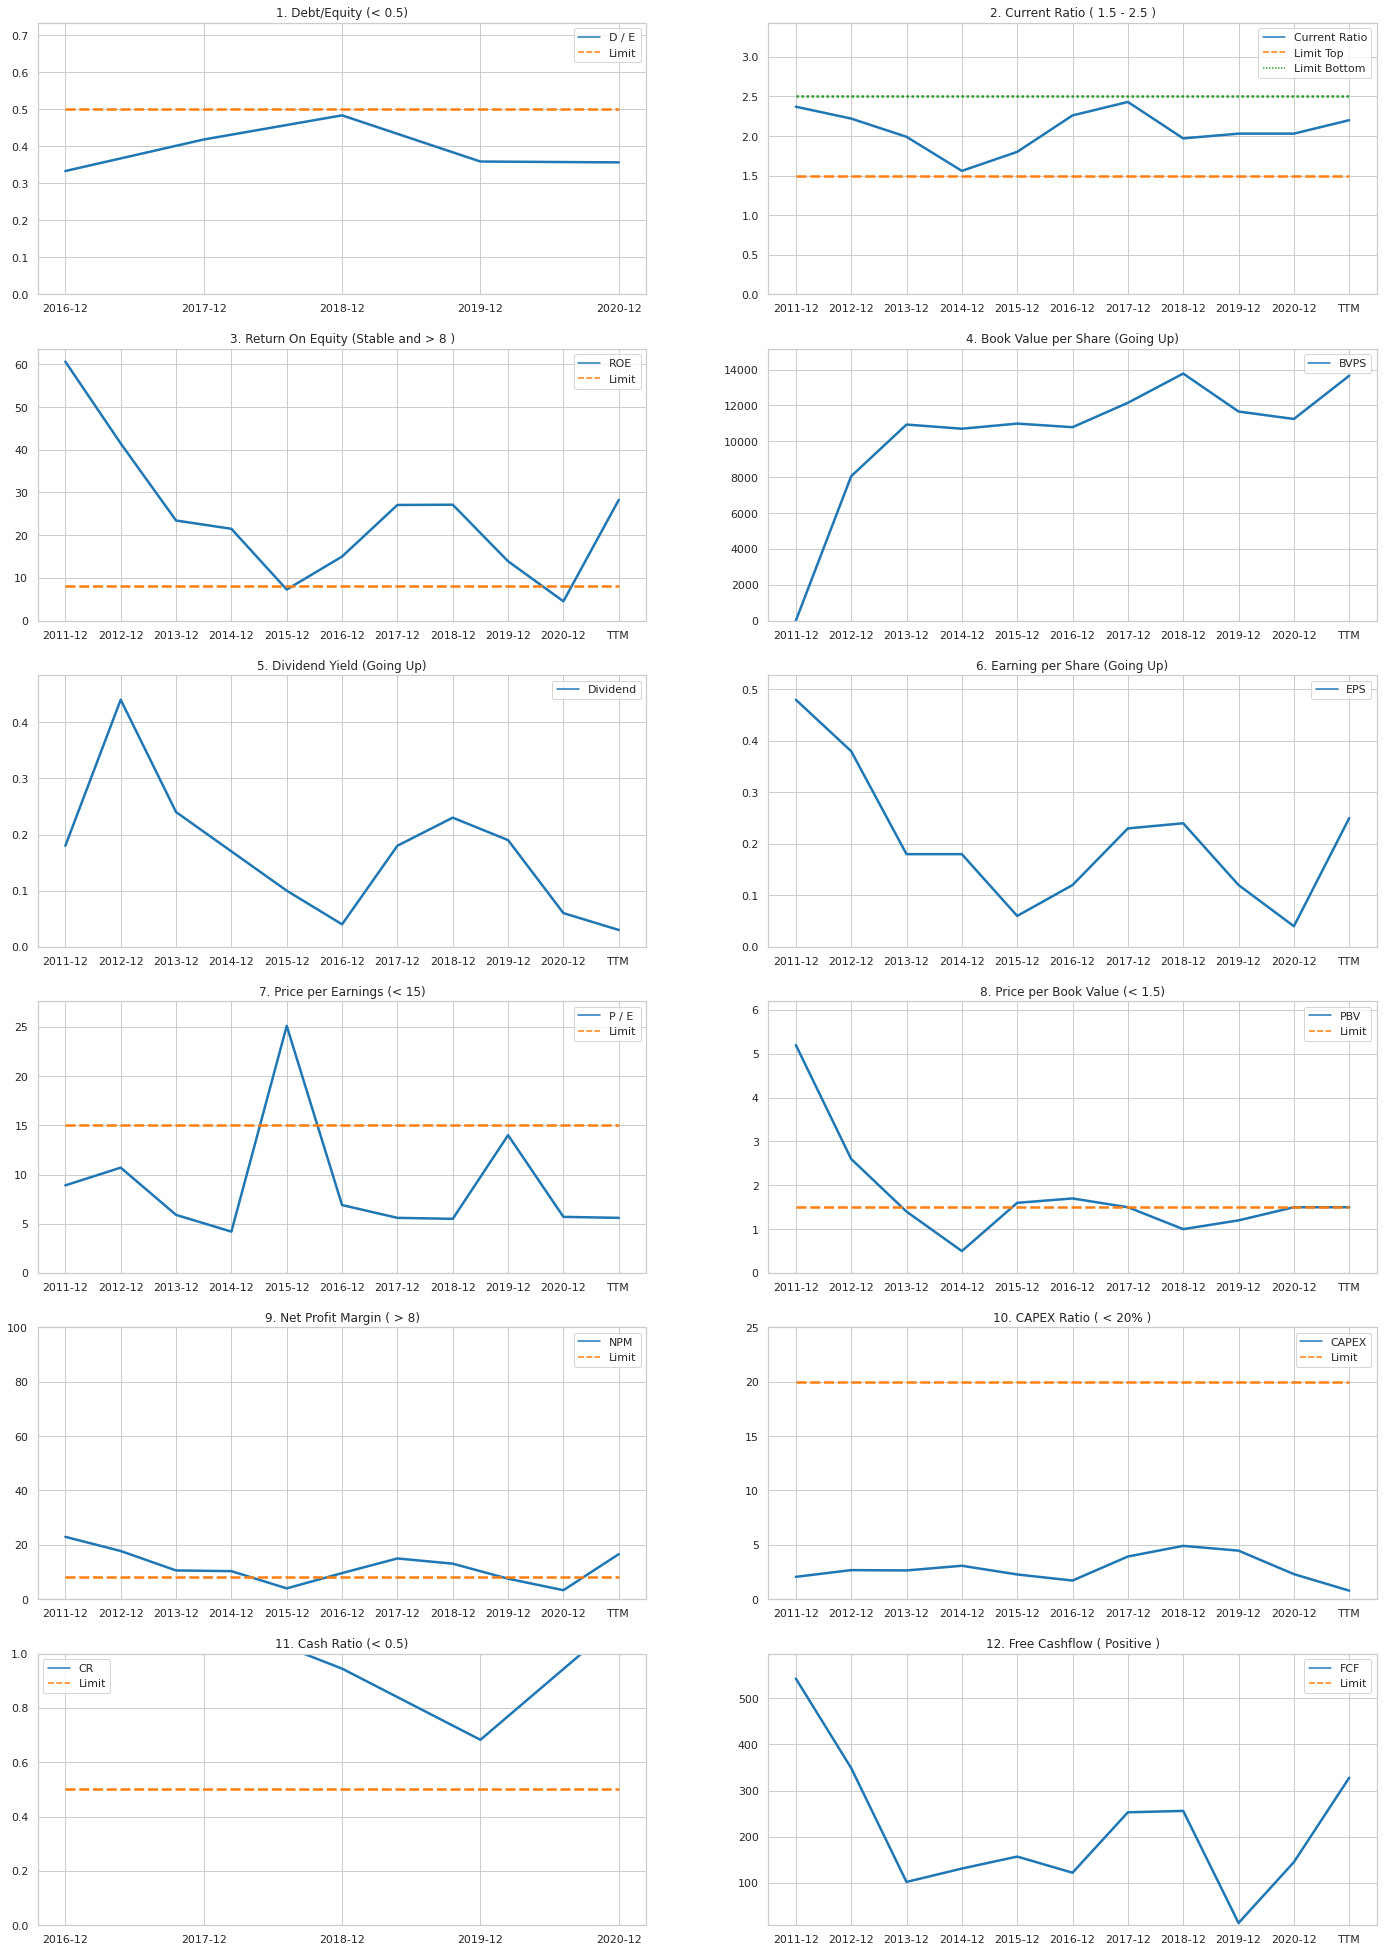

In [ ]:
#@title Start Calculating Stock Value
stock = "ITMG" #@param {type:"string"}

stock_info = yf.Ticker(stock+'.JK')

driver = wd
driver.implicitly_wait(10)
# Financial Balance Sheet Tab
link = "http://financials.morningstar.com/balance-sheet/bs.html?t={0}&region=idn&culture=en-US".format(stock)

driver.get(link)
year = financialsGetRowText("Year")
totalAsset = financialsGetRow("data_tts1")
# currentAsset = financialsGetRow("data_ttg1")
totalLiabilities = financialsGetRow("data_ttg5")
currentLiabilities = financialsGetRow("data_ttgg5")
totalEquity = financialsGetRow("data_ttg8")
totalCash = financialsGetRow("data_ttgg1")

keyRatiosLink = "http://financials.morningstar.com/ratios/r.html?t={0}&region=idn&culture=en-US".format(stock)
driver.get(keyRatiosLink)
#Profitability Tab
year10 = np.array([])
for x in range(11):
  year10 = np.append(year10, driver.find_element_by_id("Y{0}".format(x)).text) 

roe = ratiosGetRowByCssSelector("i26")
revenue = ratiosGetRowByCssSelector("i0")
bvps = ratiosGetRowByCssSelector("i8")
totalShare = ratiosGetRowByCssSelector("i7")
dividend = ratiosGetRowByCssSelector("i6")
eps = ratiosGetRowByCssSelector("i5")
netIncome = ratiosGetRowByCssSelector("i4")
fcf = ratiosGetRowByCssSelector("i11")
netProfitMargin = np.divide(netIncome, revenue)

#Cashflow Tab
driver.find_element_by_css_selector("#keyStatWrap > div > ul > li:nth-child(3) > a").click()
capExRatio = ratiosGetRowByCssSelector("i42")

#Financial Health Tab
driver.find_element_by_css_selector("#keyStatWrap > div > ul > li:nth-child(4) > a").click()
currentRatio = ratiosGetRowByCssSelector("i65")

valuationLink = "http://financials.morningstar.com/valuation/price-ratio.html?t={0}&region=idn&culture=en-US".format(stock)
driver.get(valuationLink)
pe = valuationGetRowByCssSelector("#valuation_history_table > tbody > tr:nth-child(2)")
pbv = valuationGetRowByCssSelector("#valuation_history_table > tbody > tr:nth-child(5)")


# ##################

fig, ax =plt.subplots(6,2, figsize=(24,35))

debtPerEquity = np.divide(totalLiabilities, totalEquity)
data = pd.DataFrame(columns=["D / E"], data= debtPerEquity, index= year)
data["Limit"] = 0.5
sns.set_theme(style="whitegrid")
de = sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[0,0]).set(ylim=(0, debtPerEquity.max() + 0.25), title="1. Debt/Equity (< 0.5)")

# currentRatio = np.divide(currentAsset, currentLiabilities)
crData = pd.DataFrame(columns= ['Current Ratio'], data= currentRatio, index = year10)
crData["Limit Top"] = 1.5
crData["Limit Bottom"] = 2.5
sns.lineplot(data=crData, palette="tab10", linewidth=2.5, ax=ax[0,1]).set(ylim=(0, currentRatio.max()+1), title="2. Current Ratio ( 1.5 - 2.5 )")

roeData = pd.DataFrame(columns=["ROE"], data= roe, index= year10)
roeData["Limit"] = 8
sns.lineplot(data=roeData, palette="tab10", linewidth=2.5, ax=ax[1,0]).set(ylim=(0, roe.max()+3), title="3. Return On Equity (Stable and > 8 )")

bvpsData = pd.DataFrame(columns=["BVPS"], data= bvps, index= year10)
sns.lineplot(data=bvpsData, palette="tab10", linewidth=2.5, ax=ax[1,1]).set(ylim=(0, bvps.max()+bvps.max()*10/100), title="4. Book Value per Share (Going Up)")

dividendData = pd.DataFrame(columns=["Dividend"], data= dividend, index= year10)
sns.lineplot(data=dividendData, palette="tab10", linewidth=2.5, ax=ax[2,0]).set(ylim=(0, dividend.max()+dividend.max()*10/100), title="5. Dividend Yield (Going Up)")

epsData = pd.DataFrame(columns=["EPS"], data= eps, index= year10)
sns.lineplot(data=epsData, palette="tab10", linewidth=2.5, ax=ax[2,1]).set(ylim=(0, eps.max()+eps.max()*10/100), title="6. Earning per Share (Going Up)")

perData = pd.DataFrame(columns=["P / E"], data= pe, index= year10)
perData["Limit"] = 15
sns.lineplot(data=perData, palette="tab10", linewidth=2.5, ax=ax[3,0]).set(ylim=(0, pe.max()+pe.max()*10/100), title="7. Price per Earnings (< 15)")

pbvData = pd.DataFrame(columns=["PBV"], data= pbv, index= year10)
pbvData["Limit"] = 1.5
sns.lineplot(data=pbvData, palette="tab10", linewidth=2.5, ax=ax[3,1]).set(ylim=(0, pbv.max()+1), title="8. Price per Book Value (< 1.5)")

# divRatio = np.divide(np.multiply(dividend, totalShare), netIncome)
# divRatio = pd.DataFrame(columns=["DPR"], data= divRatio, index= year10)
# divRatio["Limit Bot"] = 15
# divRatio["Limit Top"] = 50
# divRatio["DPR"] *= 100
# sns.lineplot(data=divRatio, palette="tab10", linewidth=2.5, ax=ax[4,0]).set(ylim=(0, divRatio["DPR"].max() + 5), title="Dividend Payout Ratio (15-50%)")

npmData = pd.DataFrame(columns=["NPM"], data= netProfitMargin, index= year10)
npmData["Limit"] = 8
npmData["NPM"] *= 100
sns.lineplot(data=npmData, palette="tab10", linewidth=2.5, ax=ax[4,0]).set(ylim=(0, 100), title="9. Net Profit Margin ( > 8)")

capExRatioData = pd.DataFrame(columns=["CAPEX"], data= capExRatio, index= year10)
capExRatioData["Limit"] = 20
sns.lineplot(data=capExRatioData, palette="tab10", linewidth=2.5, ax=ax[4,1]).set(ylim=(0, 25), title="10. CAPEX Ratio ( < 20% )")

cashRatio = np.divide(totalCash,currentLiabilities)
cashRatio = pd.DataFrame(columns=["CR"], data= cashRatio, index= year)
cashRatio["Limit"] = 0.5
sns.lineplot(data=cashRatio, palette="tab10", linewidth=2.5, ax=ax[5,0]).set(ylim=(0, 1), title="11. Cash Ratio (< 0.5)")

fcfData = pd.DataFrame(columns=["FCF"], data= fcf, index= year10)
fcfData["Limit"] = 0
sns.lineplot(data=fcfData, palette="tab10", linewidth=2.5, ax=ax[5,1]).set(ylim=(fcf.min() - 5, fcf.max()+ fcf.max()/ 10), title="12. Free Cashflow ( Positive )")



In [ ]:
#@title Intrinsic Value Calculation
# Intrinsic Value Calculation
from IPython.display import display

current_price= stock_info.info['currentPrice']

# PER Valuation
mean_per_ttm = pe.mean()
eps_ttm = epsData.loc['TTM']['EPS']
per_valuation_fair_price = mean_per_ttm * eps_ttm
per_valuation_mos = calculate_mos(current_price, per_valuation_fair_price)

# PBV Ratio Method
current_bvps = stock_info.info['bookValue']
mean_pbv = pbv.mean()
pbv_ratio_fair_price = current_bvps * mean_pbv
pbv_ratio_mos = calculate_mos(current_price, pbv_ratio_fair_price)

# Benjamin Graham Formula
# http://www.ibpa.co.id/
xpath = '//*[@id="dnn_ctr504_ListGovernmentBond_gvTenor1"]/tbody/tr[12]/td[3]'
driver.get('http://ibpa.co.id/DataPasarSuratUtang/HargadanYieldHarian/tabid/84/Default.aspx')
yield_obligation_government_10y = float(driver.find_element_by_xpath(xpath).text)
yield_obligation_corporate_10y = 7.75
growth_constant = 7

#Calculate EPS expected Growth Rate
start_idx = 0
last_eps = eps[-2]
for i in range(len(eps)):
    if(eps[i] > 0):
      start_idx = i
      break
eps_expected_growth_rate = (((last_eps / eps[start_idx])**(1/(eps.size - 1 - start_idx)))-1) * 100
bg_fair_price = last_eps * (growth_constant + eps_expected_growth_rate) * yield_obligation_government_10y / yield_obligation_corporate_10y
bg_mos = calculate_mos(current_price, bg_fair_price)

intrinsic_value = pd.DataFrame({"Method" : ["PER Valuation", "PBV Ratio Method", "Benjamin Graham Formula"],
                               "Current Price" : [current_price, current_price, current_price],
                               "Fair Price" : [per_valuation_fair_price, pbv_ratio_fair_price, bg_fair_price],
                               "MOS" : [per_valuation_mos, pbv_ratio_mos, bg_mos]})

print("Intrinsic Value Calculation")
print('')
display(intrinsic_value)
print('')
print("Explanation")
print("- Ignore if MOS result is negative")
print("- The more positive result the better it is")
print("- For more conservative result you can divide MOS by 2 or more, or you can choose the smallest value then divide it")

Intrinsic Value Calculation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


,Method,Current Price,Fair Price,MOS
0,PER Valuation,20175,2.229545,-9.047930e+05
1,PBV Ratio Method,20175,1.708527,-1.180742e+06
2,Benjamin Graham Formula,20175,-0.514545,3.921036e+06



Explanation
- Ignore if MOS result is negative
- The more positive result the better it is
- For more conservative result you can divide MOS by 2 or more, or you can choose the smallest value then divide it


In [ ]:
#@title Start Calculating Stock Value (USA Stock) { vertical-output: true }
stock = "TSLA" #@param {type:"string"}
stock_info = yf.Ticker(stock)

driver = wd
driver.implicitly_wait(10)
# Financial Balance Sheet Tab
link = "http://financials.morningstar.com/balance-sheet/bs.html?t={0}".format(stock)

driver.get(link)
year = financialsGetRowText("Year")
totalAsset = financialsGetRow("data_tts1")
# currentAsset = financialsGetRow("data_ttg1")
totalLiabilities = financialsGetRow("data_ttg5")
currentLiabilities = financialsGetRow("data_ttgg5")
totalEquity = financialsGetRow("data_ttg8")
totalCash = financialsGetRow("data_ttgg1")

keyRatiosLink = "http://financials.morningstar.com/ratios/r.html?t={0}".format(stock)
driver.get(keyRatiosLink)
#Profitability Tab
year10 = np.array([])
for x in range(11):
  year10 = np.append(year10, driver.find_element_by_id("Y{0}".format(x)).text) 

roe = ratiosGetRowByCssSelector("i26")
revenue = ratiosGetRowByCssSelector("i0")
bvps = ratiosGetRowByCssSelector("i8")
totalShare = ratiosGetRowByCssSelector("i7")
dividend = ratiosGetRowByCssSelector("i6")
eps = ratiosGetRowByCssSelector("i5")
netIncome = ratiosGetRowByCssSelector("i4")
fcf = ratiosGetRowByCssSelector("i11")
netProfitMargin = np.divide(netIncome, revenue)

#Cashflow Tab
driver.find_element_by_css_selector("#keyStatWrap > div > ul > li:nth-child(3) > a").click()
capExRatio = ratiosGetRowByCssSelector("i42")

#Financial Health Tab
driver.find_element_by_css_selector("#keyStatWrap > div > ul > li:nth-child(4) > a").click()
currentRatio = ratiosGetRowByCssSelector("i65")

valuationLink = "http://financials.morningstar.com/valuation/price-ratio.html?t={0}".format(stock)
driver.get(valuationLink)
pe = valuationGetRowByCssSelector("#valuation_history_table > tbody > tr:nth-child(2)")
pbv = valuationGetRowByCssSelector("#valuation_history_table > tbody > tr:nth-child(5)")


# ##################

fig, ax =plt.subplots(6,2, figsize=(24,35))
plt.suptitle(title + ' - ' + stock)

debtPerEquity = np.divide(totalLiabilities, totalEquity)
data = pd.DataFrame(columns=["D / E"], data= debtPerEquity, index= year)
data["Limit"] = 0.5
sns.set_theme(style="whitegrid")
de = sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[0,0]).set(ylim=(0, debtPerEquity.max() + 0.25), title="1. Debt/Equity (< 0.5)")

# currentRatio = np.divide(currentAsset, currentLiabilities)
crData = pd.DataFrame(columns= ['Current Ratio'], data= currentRatio, index = year10)
crData["Limit Top"] = 1.5
crData["Limit Bottom"] = 2.5
sns.lineplot(data=crData, palette="tab10", linewidth=2.5, ax=ax[0,1]).set(ylim=(0, currentRatio.max()+1), title="2. Current Ratio ( 1.5 - 2.5 )")

roeData = pd.DataFrame(columns=["ROE"], data= roe, index= year10)
roeData["Limit"] = 8
sns.lineplot(data=roeData, palette="tab10", linewidth=2.5, ax=ax[1,0]).set(ylim=(0, roe.max()+3), title="3. Return On Equity (Stable and > 8 )")

bvpsData = pd.DataFrame(columns=["BVPS"], data= bvps, index= year10)
sns.lineplot(data=bvpsData, palette="tab10", linewidth=2.5, ax=ax[1,1]).set(ylim=(0, bvps.max()+bvps.max()*10/100), title="4. Book Value per Share (Going Up)")

dividendData = pd.DataFrame(columns=["Dividend"], data= dividend, index= year10)
sns.lineplot(data=dividendData, palette="tab10", linewidth=2.5, ax=ax[2,0]).set(ylim=(0, dividend.max()+dividend.max()*10/100), title="5. Dividend Yield (Going Up)")

epsData = pd.DataFrame(columns=["EPS"], data= eps, index= year10)
sns.lineplot(data=epsData, palette="tab10", linewidth=2.5, ax=ax[2,1]).set(ylim=(0, eps.max()+eps.max()*10/100), title="6. Earning per Share (Going Up)")

perData = pd.DataFrame(columns=["P / E"], data= pe, index= year10)
perData["Limit"] = 15
sns.lineplot(data=perData, palette="tab10", linewidth=2.5, ax=ax[3,0]).set(ylim=(0, pe.max()+pe.max()*10/100), title="7. Price per Earnings (< 15)")

pbvData = pd.DataFrame(columns=["PBV"], data= pbv, index= year10)
pbvData["Limit"] = 1.5
sns.lineplot(data=pbvData, palette="tab10", linewidth=2.5, ax=ax[3,1]).set(ylim=(0, pbv.max()+1), title="8. Price per Book Value (< 1.5)")

# divRatio = np.divide(np.multiply(dividend, totalShare), netIncome)
# divRatio = pd.DataFrame(columns=["DPR"], data= divRatio, index= year10)
# divRatio["Limit Bot"] = 15
# divRatio["Limit Top"] = 50
# divRatio["DPR"] *= 100
# sns.lineplot(data=divRatio, palette="tab10", linewidth=2.5, ax=ax[4,0]).set(ylim=(0, divRatio["DPR"].max() + 5), title="Dividend Payout Ratio (15-50%)")

npmData = pd.DataFrame(columns=["NPM"], data= netProfitMargin, index= year10)
npmData["Limit"] = 8
npmData["NPM"] *= 100
sns.lineplot(data=npmData, palette="tab10", linewidth=2.5, ax=ax[4,0]).set(ylim=(0, 100), title="9. Net Profit Margin ( > 8)")

capExRatioData = pd.DataFrame(columns=["CAPEX"], data= capExRatio, index= year10)
capExRatioData["Limit"] = 20
sns.lineplot(data=capExRatioData, palette="tab10", linewidth=2.5, ax=ax[4,1]).set(ylim=(0, 25), title="10. CAPEX Ratio ( < 20% )")

cashRatio = np.divide(totalCash,currentLiabilities)
cashRatio = pd.DataFrame(columns=["CR"], data= cashRatio, index= year)
cashRatio["Limit"] = 0.5
sns.lineplot(data=cashRatio, palette="tab10", linewidth=2.5, ax=ax[5,0]).set(ylim=(0, 1), title="11. Cash Ratio (< 0.5)")

fcfData = pd.DataFrame(columns=["FCF"], data= fcf, index= year10)
fcfData["Limit"] = 0
sns.lineplot(data=fcfData, palette="tab10", linewidth=2.5, ax=ax[5,1]).set(ylim=(fcf.min() - 5, fcf.max()+ fcf.max()/ 10), title="12. Free Cashflow ( Positive )")



In [ ]:
#@title Intrinsic Value Calculation
# Intrinsic Value Calculation
from IPython.display import display

current_price= stock_info.info['currentPrice']

# PER Valuation
mean_per_ttm = pe.mean()
eps_ttm = epsData.loc['TTM']['EPS']
per_valuation_fair_price = mean_per_ttm * eps_ttm
per_valuation_mos = calculate_mos(current_price, per_valuation_fair_price)

# PBV Ratio Method
current_bvps = stock_info.info['bookValue']
mean_pbv = pbv.mean()
pbv_ratio_fair_price = current_bvps * mean_pbv
pbv_ratio_mos = calculate_mos(current_price, pbv_ratio_fair_price)

# Benjamin Graham Formula
# http://www.ibpa.co.id/
corporate = 'body > main > div > div:nth-child(4) > div > div > div > div > div.col-md-8 > div.hidden-md > div:nth-child(3) > div.panel-content > div > div:nth-child(1) > table > tbody > tr:nth-child(1) > td:nth-child(2)'
driver.get('https://ycharts.com/indicators/us_coporate_aaa_effective_yield')
yield_obligation_government_10y = 4.4
yield_aaa_corporate_bonds = float(driver.find_element(By.CSS_SELECTOR, corporate).text.replace("%", ""))
growth_constant = 8.5

#Calculate EPS expected Growth Rate
start_idx = 0
last_eps = eps[-2]
for i in range(len(eps)):
    if(eps[i] > 0):
      start_idx = i
      break
eps_expected_growth_rate = (((last_eps / eps[start_idx])**(1/(eps.size - 1 - start_idx)))-1) * 100
bg_fair_price = last_eps * (growth_constant + eps_expected_growth_rate) * yield_obligation_government_10y / yield_aaa_corporate_bonds
bg_mos = calculate_mos(current_price, bg_fair_price)

intrinsic_value = pd.DataFrame({"Method" : ["PER Valuation", "PBV Ratio Method", "Benjamin Graham Formula"],
                               "Current Price" : [current_price, current_price, current_price],
                               "Fair Price" : [per_valuation_fair_price, pbv_ratio_fair_price, bg_fair_price],
                               "MOS" : [per_valuation_mos, pbv_ratio_mos, bg_mos]})

print("Intrinsic Value Calculation")
print('')
display(intrinsic_value)
print('')
print("Explanation")
print("- Ignore if MOS result is negative")
print("- The more positive result the better it is")
print("- For more conservative result you can divide MOS by 2 or more, or you can choose the smallest value then divide it")

Intrinsic Value Calculation



,Method,Current Price,Fair Price,MOS
0,PER Valuation,1156.87,105.168000,-1000.020919
1,PBV Ratio Method,1156.87,641.046045,-80.465976
2,Benjamin Graham Formula,1156.87,11.733333,-9759.687500



Explanation
- Ignore if MOS result is negative
- The more positive result the better it is
- For more conservative result you can divide MOS by 2 or more, or you can choose the smallest value then divide it
